## Курсовой проект
### Мигалев Яков

### 1. Подключение библиотек и загрузка данных <a class='anchor' id='load'>

In [225]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [226]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Загрузим датасеты

In [248]:
train_source = '~/Documents/gb/dataset/train.csv'
test_source = '~/Documents/gb/dataset/test.csv'

In [249]:
main_train = pd.read_csv(train_source)
main_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [250]:
main_test = pd.read_csv(test_source)
main_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

### 2. Приведение типов данных<a class='anchor' id='types'>

In [133]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [251]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

Приведем тренеровочные данные

In [252]:
main_train = reduce_mem_usage(main_train)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


Приведем тестовые данные

In [253]:
main_test = reduce_mem_usage(main_test)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


Проверим, что типы выглядят одинаково на тестовой и тренеровочной выборке:

In [162]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [111]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             5000 non-null   int16   
 1   DistrictId     5000 non-null   int16   
 2   Rooms          5000 non-null   float32 
 3   Square         5000 non-null   float32 
 4   LifeSquare     3959 non-null   float32 
 5   KitchenSquare  5000 non-null   float32 
 6   Floor          5000 non-null   int8    
 7   HouseFloor     5000 non-null   float32 
 8   HouseYear      5000 non-null   int16   
 9   Ecology_1      5000 non-null   float32 
 10  Ecology_2      5000 non-null   category
 11  Ecology_3      5000 non-null   category
 12  Social_1       5000 non-null   int8    
 13  Social_2       5000 non-null   int16   
 14  Social_3       5000 non-null   int16   
 15  Healthcare_1   2623 non-null   float32 
 16  Helthcare_2    5000 non-null   int8    
 17  Shops_1        5000 non-null   in

Признак HouseYear имеет разный тип. Не факт, что это критично, но все же лучше не рисковать

In [254]:
main_test['HouseYear'] = main_test['HouseYear'].astype(np.int32)

### 3. Обзор данных<a class='anchor' id='dataview'>

### Распределение целевой переменной <a class='anchor' id='target'>

Построим график распределения целевой переменной и найдем медиану, среднее и моду

In [188]:
target_mean = round(main_train['Price'].mean(), 2)
target_median = main_train['Price'].median()
target_mode = main_train['Price'].mode()[0]

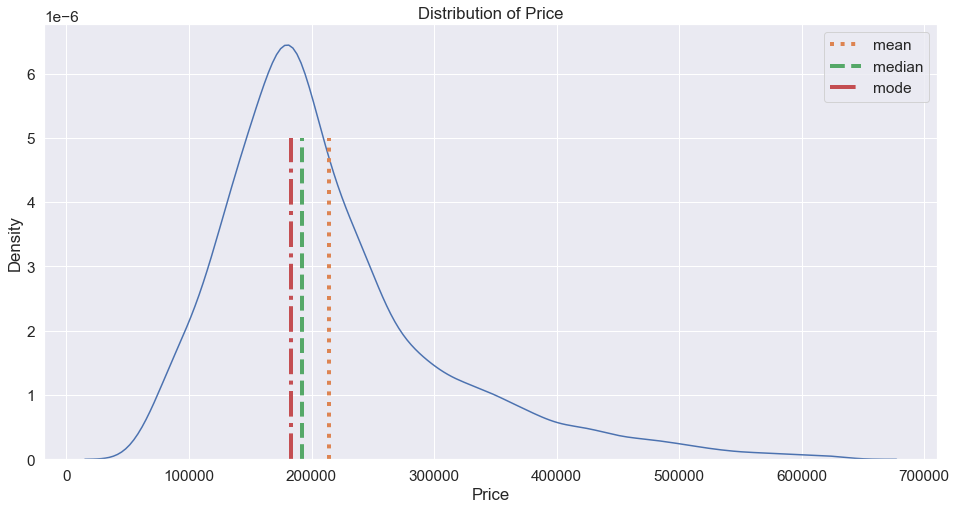

In [201]:
plt.figure(figsize = (16, 8))

sns.kdeplot(main_train['Price'])

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### Обзор количественных переменных<a class='anchor' id='numeric'>

Выделим количественные признаки для анализа

In [202]:
df_num_features = main_train.select_dtypes(include=['float64', 'float32', 'float16'])

Удалим целевой признак

In [203]:
df_num_features.drop(columns='Price', inplace=True)

In [204]:
df_num_features.head(5)

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1
0,3.0,115.027313,NaN,10.0,10.0,0.075424,NaN
1,1.0,39.832523,23.169222,8.0,8.0,0.118537,1183.0
2,3.0,78.342216,47.671970,10.0,17.0,0.025609,240.0
3,1.0,40.409908,NaN,1.0,22.0,0.007122,NaN
4,2.0,64.285065,38.562515,9.0,16.0,0.282798,NaN


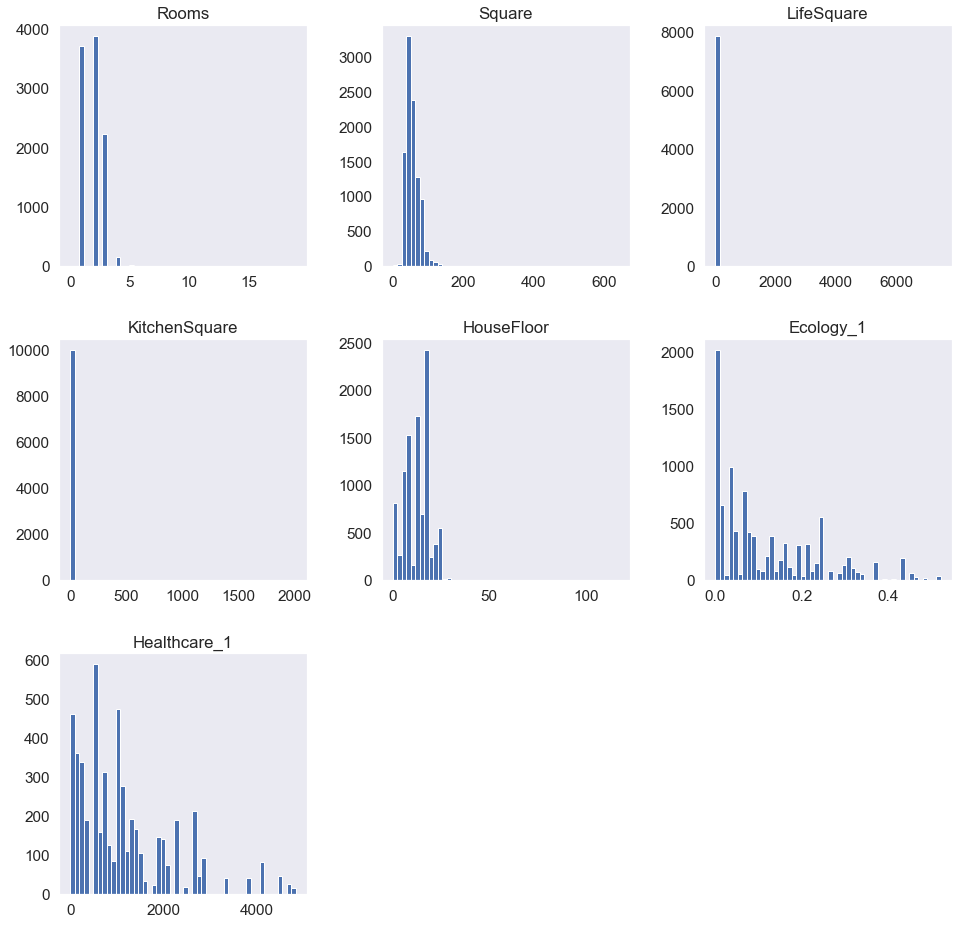

In [205]:
df_num_features.hist(figsize=(16,16), bins=50, grid=False);

Построим матрицу корреляции

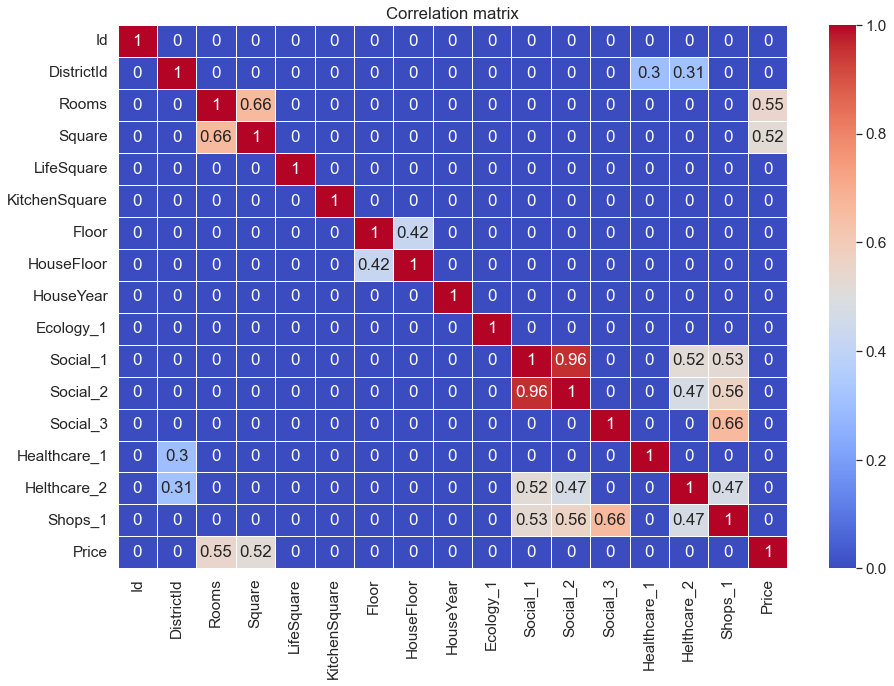

In [206]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = main_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Сильная корреляция между параметрами Social_1 и Social_2, один из них можно опустить. С целевой переменной немного коррелируют только количество комнат и площадь 

In [207]:
main_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,4859.01902,43.587592,0.839522,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Отсюда можно сделать следующие выводы:
- Переменные LifeSquare и Healthcare_1 требуется дополнить данными
- Минимальное значение в Rooms, KitchenSquare, HouseFloor, LifeSquare и Square явно должно быть больше
- Максимальное значение Rooms, Square, LifeSquare, KitchenSquare также не соответствует правде
- Довольно большое количество значений с KitchenSquare = 1 м, что тоже нуждается в доп проверке
- Количество этажей в доме не может быть меньше этажа квартиры


#### Анализ количества этажей и этажность дома

In [208]:
main_train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.],
      dtype=float32)

In [209]:
main_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

0 этажей в доме явно быть не может, узнаем сколько таких домов

In [210]:
sum(main_train['HouseFloor']==0)

269

Поскольку число этажей в доме не может быть меньше, чем этаж квартиры, заполним пропуски количеством этажей + медиана от  разности этажей в доме и этажа квартиры по выборке (только для валидных квартир)

Найдем такую медиану:

#### (здесь и далее для своего удобства я буду писать формулы, которые позже включил в класс Preproc, а здесь их закомментирую)

In [ ]:
#delta_floor = int((main_train.loc[main_train.loc[main_train['Floor'] < main_train['HouseFloor']].index,'HouseFloor'] - main_train.#loc[main_train.loc[main_train['Floor'] < main_train['HouseFloor']].index,'Floor']).median())

In [ ]:
#HouseFloor_out = main_train.loc[main_train['HouseFloor']==0].index

In [ ]:
#main_train.loc[HouseFloor_out, 'HouseFloor'] = main_train.loc[HouseFloor_out, 'Floor'] + delta_floor

Найдем выбросы по этажам (если этаж больше кол-ва этажей в доме)

In [ ]:
#floor_out = main_train.loc[main_train['Floor'] > main_train['HouseFloor']].index
#main_train.loc[floor_out, 'Floor'] = main_train.loc[floor_out, 'HouseFloor'].apply(lambda x: random.randint(1, x))

/Users/hyperjacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


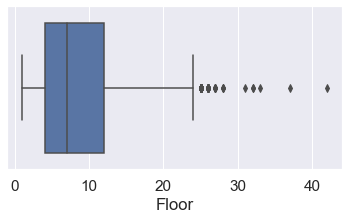

In [211]:
plt.figure(figsize=(6, 3))

sns.boxplot(main_train['Floor'], whis=1.5)

plt.xlabel('Floor')
plt.show()

/Users/hyperjacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


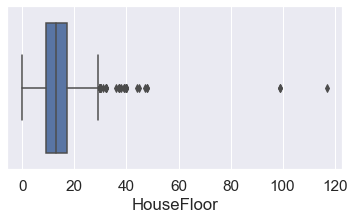

In [212]:
plt.figure(figsize=(6, 3))

sns.boxplot(main_train['HouseFloor'], whis=1.5)

plt.xlabel('HouseFloor')
plt.show()

Приравняем строки со значениями этажей в доме больше 60 к 60

In [ ]:
#main_train.loc[main_train['HouseFloor'] > 60, 'HouseFloor'] = 60

#### Анализ LifeSquare, Square, KitchenSquare

Приравняем жилую площадь более 200 к 200

In [ ]:
#main_train['LifeSquare'].hist(figsize=(4,4), bins=20, grid=False);

In [ ]:
#main_train.loc[main_train['LifeSquare']<10, 'LifeSquare'].count()

In [216]:
len(main_train) - main_train.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Значений слишком много, чтоб их выкидывать, приравняем выбросы и отсутствующие значения к медиане

In [ ]:
#main_train.loc[main_train['LifeSquare'].isnull(), 'LifeSquare'] = main_train['LifeSquare'].median()

In [ ]:
#main_train.loc[main_train['LifeSquare']<10, 'LifeSquare'] = main_train['LifeSquare'].median()

Проанализируем площадь кухонь

In [217]:
main_train.loc[main_train['KitchenSquare']<1, 'KitchenSquare'].count()

697

In [218]:
main_train.loc[main_train['KitchenSquare']>20, 'KitchenSquare'].count()

48

Избавимся от выбросов

In [ ]:
#main_train.loc[main_train['KitchenSquare']<2, 'KitchenSquare'] = 2

In [ ]:
#main_train.loc[main_train['KitchenSquare']>20, 'KitchenSquare'] = 20

Проанализируем площадь квартиры - она должна быть больше площади кухни + жилой

Найдем индексы всех элементов не удовлетворяющих данному условию

In [219]:
Square_out = main_train[(main_train['KitchenSquare'] + main_train['LifeSquare']) > (main_train['Square'])].index
Square_out

Int64Index([  33,   34,   42,   48,   64,   77,   78,   89,  100,  111,
            ...
            9907, 9917, 9927, 9937, 9947, 9960, 9962, 9979, 9987, 9993],
           dtype='int64', length=845)

In [220]:
main_train[(main_train['KitchenSquare'] + main_train['LifeSquare']) > (main_train['Square'])].index

Int64Index([  33,   34,   42,   48,   64,   77,   78,   89,  100,  111,
            ...
            9907, 9917, 9927, 9937, 9947, 9960, 9962, 9979, 9987, 9993],
           dtype='int64', length=845)

Найдем среднее значение для элементов, которые удовлетворяют условию

In [138]:
#Square_in = main_train[(main_train['KitchenSquare'] + main_train['LifeSquare']) < (main_train['Square'])].index

In [139]:
#delta_square = (main_train.loc[Square_in, 'Square'] - (main_train.loc[Square_in, 'KitchenSquare'] + main_train.loc[Square_in, 'LifeSquare'])).median()
#delta_square

12.153009414672852

Вычислим новую общую площадь для элементов, не удовлетворяющих условиям как скмма площади кухни и жилой + средняя дельта

In [140]:
#main_train.loc[Square_out, 'Square'] =  main_train.loc[Square_out, 'LifeSquare'] + main_train.loc[Square_out, 'KitchenSquare'] + delta_square
#main_train.loc[Square_out, 'Square']

115      74.395943
130      46.934273
133      54.934273
234      46.934273
267      91.847771
           ...    
9735     72.505196
9851    129.263489
9869     46.934273
9942     54.355225
9965     99.458252
Name: Square, Length: 250, dtype: float32

этим значением также пожертвуем

### ROOMS

In [221]:
main_train.loc[(main_train['Rooms'] > 6) | (main_train['Rooms'] == 0), 'Rooms']

2004    10.0
2194     0.0
2728    10.0
3780     0.0
5894     0.0
6088    19.0
6401     0.0
7644     0.0
7929     0.0
9767     0.0
9869     0.0
Name: Rooms, dtype: float32

Здесь данных слишком мало, чтоб терять время на обдумывание лучшего способа - возьмем медиану

In [ ]:
#main_train.loc[(main_train['Rooms'] > 6) | (main_train['Rooms'] == 0), 'Rooms'] = main_train['Rooms'].median()

### Healthcare_1

In [222]:
Healthcare_1_mean = round(main_train['Healthcare_1'].mean(), 2)
Healthcare_1_median = main_train['Healthcare_1'].median()
Healthcare_1_mode = main_train['Healthcare_1'].mode()[0]

/Users/hyperjacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


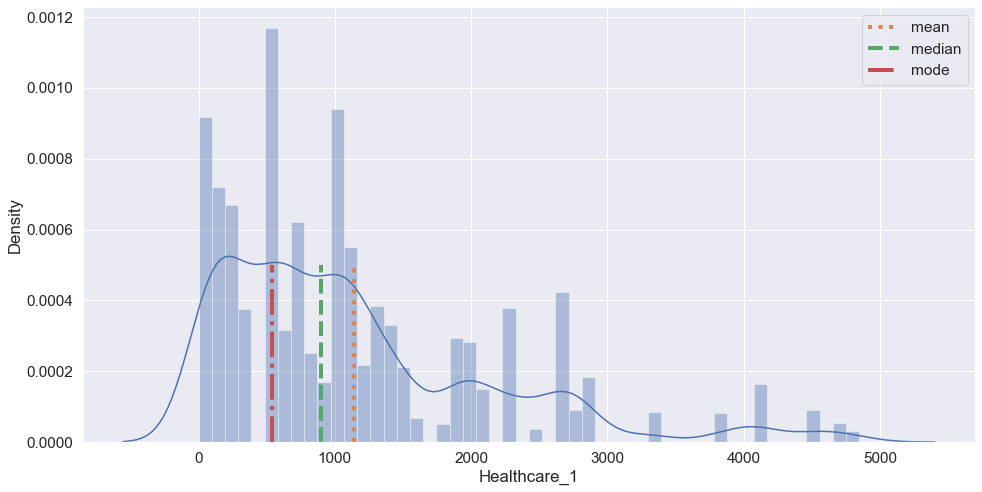

In [223]:
plt.figure(figsize = (16, 8))
sns.distplot(main_train['Healthcare_1'], bins=50) 

y = np.linspace(0, 0.0005, 10)
plt.plot([Healthcare_1_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([Healthcare_1_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([Healthcare_1_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.legend()
plt.show()

Будем брать моду

In [ ]:
#main_train.loc[main_train['Healthcare_1'].isnull(), 'Healthcare_1'] = main_train['Healthcare_1'].mode()[0]

### Обзор номинативных переменных<a class='anchor' id='cats'>

In [234]:
df_obj_features = main_train.select_dtypes(include='object')
df_obj_features.head()

""
0
1
2
3
4


In [235]:
main_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [236]:
main_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [237]:
main_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [238]:
main_train['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

Обработка выбросов:

In [239]:
main_train.loc[main_train['HouseYear'] > 2023, 'HouseYear']

8828        4968
9163    20052011
Name: HouseYear, dtype: int32

Понятно, что это 1968 и 2011, но на тестовой выборке мб другие данные, так что легче обработать автоматом

In [240]:
main_train.loc[main_train['HouseYear'] > 2023, 'HouseYear'] = main_train['HouseYear'].median()

/Users/hyperjacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


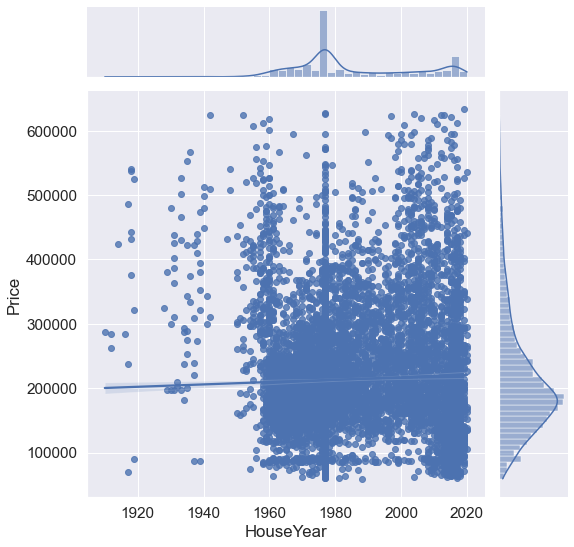

In [241]:
grid = sns.jointplot(main_train['HouseYear'], main_train['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Также в количественные переменные превратим год постройки дома 

**возраст дома (0-100)**

Разделим дома по известным годам застройки

In [255]:
def age_to_cat(X):

    X['age_cat'] = 0
    #Очень старые
    X.loc[X['HouseYear'] <= 1955, 'age_cat'] = 1 
    # Хрущевки:
    X.loc[(X['HouseYear'] > 1956) & (X['HouseYear'] <= 1973), 'age_cat'] = 2
    #Поздние советские
    X.loc[(X['HouseYear'] > 1973) & (X['HouseYear'] <= 1991), 'age_cat'] = 3
    #  Девяностые
    X.loc[(X['HouseYear'] > 1991) & (X['HouseYear'] <= 2000), 'age_cat'] = 4
    #  Нулевые
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'age_cat'] = 5
    #  Десятые
    X.loc[(X['HouseYear'] > 2010), 'age_cat'] = 6

    return X

### 5. Отбор и построение новых признаков<a class='anchor' id='feature'>

Избавимся от ID и одноц из 2х переменных с кореляцией 96%

Сильная корреляция между параметрами Social_1 и Social_2, один из них можно опустить. С целевой переменной немного коррелируют только количество комнат и площадь

In [ ]:
#main_test.drop(columns='Social_2', inplace=True)
#main_train.drop(columns='Social_2', inplace=True)

Разобьем вещественные признаки и дома на категории

In [ ]:
#main_train = pd.concat([main_train, pd.get_dummies(main_train['Ecology_2'])], axis=1)
#main_train = pd.concat([main_train, pd.get_dummies(main_train['Ecology_3'])], axis=1)
#main_train = pd.concat([main_train, pd.get_dummies(main_train['Shops_2'])], axis=1)
#main_train = age_to_cat(main_train)
#main_train.head()

In [115]:
#main_test = pd.concat([main_test, pd.get_dummies(main_test['Ecology_2'])], axis=1)
#main_test = pd.concat([main_test, pd.get_dummies(main_test['Ecology_3'])], axis=1)
#main_test = pd.concat([main_test, pd.get_dummies(main_test['Shops_2'])], axis=1)
#main_test = age_to_cat(main_test)
#main_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,A,B,A,B,A,B,age_cat
0,4567,44,1.0,36.847630,19.094183,5.0,5,9.0,1970,0.036122,...,1,1,B,0,1,0,1,0,1,3
1,5925,62,1.0,42.493908,42.568134,10.0,7,17.0,2017,0.072158,...,0,0,A,0,1,0,1,1,0,7
2,960,27,2.0,59.463676,NaN,9.0,19,19.0,1977,0.211401,...,0,1,B,0,1,0,1,0,1,4
3,3848,23,3.0,49.646030,33.893826,6.0,2,2.0,1965,0.014073,...,0,0,B,0,1,0,1,0,1,3
4,746,74,1.0,53.837055,NaN,1.0,8,17.0,1977,0.309479,...,0,6,B,0,1,0,1,0,1,4


Удалим вещественные переменные, чтоб не засорять выборку

### 6. Разработка общей функции <a class='anchor' id='feature'>

In [256]:
class Preproc:
    def fit(self, data):
        # Расчет медиан и вспомогательных переменных
        self.delta_floor = int((data.loc[data.loc[data['Floor'] < data['HouseFloor']].index,'HouseFloor'] - data.loc[data.loc[data['Floor'] < data['HouseFloor']].index,'Floor']).median())
        self.floor_out = data.loc[data['Floor'] > data['HouseFloor']].index
        self.emiss_median_LifeSquare = data['LifeSquare'].median()
        self.delta_square = (data.loc[data[(data['KitchenSquare'] + data['LifeSquare']) < (data['Square'])].index, 'Square'] - (data.loc[data[(data['KitchenSquare'] + data['LifeSquare']) < (data['Square'])].index, 'KitchenSquare'] + data.loc[data[(data['KitchenSquare'] + data['LifeSquare']) < (data['Square'])].index, 'LifeSquare'])).median() 
        self.emiss_median_rooms = data['Rooms'].median()
        self.emiss_mode_Healthcare_1 = data['Healthcare_1'].mode()[0]
        self.square_out = data[(data['KitchenSquare'] + data['LifeSquare']) > (data['Square'])].index
        self.emiss_median_year = data['HouseYear'].median()


        

    def transf(self, data):
        # 1. Пропуски
        data.loc[data['Healthcare_1'].isnull(), 'Healthcare_1'] = self.emiss_mode_Healthcare_1
        data.loc[data['LifeSquare'].isnull(), 'LifeSquare'] = self.emiss_median_LifeSquare
        
        # 2. Выбросы
        #2.1 Площадь жилых помещений не может быть меньше 10 и больше 200 (берем медиану)
        data.loc[data['LifeSquare'] > 200, 'LifeSquare'] = 200
        data.loc[data['LifeSquare']<10, 'LifeSquare'] = 10
        #2.2 Площадь Кухни не может быть меньше 2 и больше 20 метров (берем фиксированное значение)
        data.loc[data['KitchenSquare']<2, 'KitchenSquare'] = 2
        data.loc[data['KitchenSquare']>20, 'KitchenSquare'] = 20
        #2.3 Количество комнат не может быть больше 6 и равняться 0. Берем медиану
        data.loc[(data['Rooms'] > 6) | (data['Rooms'] == 0), 'Rooms'] = self.emiss_median_rooms
        #2.4 Этажность дома не может ровняться 0. Берем этаж квартиры и прибавляем к нему медиану разницы между этажностью и этажем квартиры в выборке 
        data.loc[data['HouseFloor']==0, 'HouseFloor'] = data.loc[data['HouseFloor']==0, 'Floor'] + self.delta_floor
        #2.5  Этаж квартиры не может быть выше, чем этажность дома
        data.loc[self.floor_out, 'Floor'] = data.loc[self.floor_out, 'HouseFloor'].apply(lambda x: random.randint(1, x))
        #2.6 Год постройки дома не может быть выше текущего года
        data.loc[data['HouseYear'] > 2022, 'HouseYear'] = self.emiss_median_year
        data.loc[data['Floor'] > 26, 'Floor'] = 26
        data.loc[data['HouseFloor'] > 40, 'HouseFloor'] = 40

        
        # 3. Расчеты при противоречии условиям
        # 3.1 Расчет площади если суммарная площадь кухни и жилой площади больше общей площади
        data.loc[self.square_out, 'Square'] =  data.loc[self.square_out, 'LifeSquare'] + data.loc[self.square_out, 'KitchenSquare'] + self.delta_square
        data.loc[data['Square']>200, 'Square'] = 200        
        
        
        #4 Новые фичи
        #4.1 Обработка категорий
        data = pd.concat([data, pd.get_dummies(data['Ecology_2'])], axis=1)
        data = pd.concat([data, pd.get_dummies(data['Ecology_3'])], axis=1)
        data = pd.concat([data, pd.get_dummies(data['Shops_2'])], axis=1)
        
        #4.2 Обработка этажей в доме (категории)
        data = age_to_cat(data)
        
        #5 Удаление столбцов
        #удалим ID
        data.drop(columns='Id', inplace=True)
        #удалим Social_2 из-за сильной корреляции
        data.drop(columns='Social_2', inplace=True)
        #удалим столбцы с категориальными признаками, которые мы обработали
        data.drop(columns='Shops_2', inplace=True)
        data.drop(columns='Ecology_3', inplace=True)
        data.drop(columns='Ecology_2', inplace=True)
        data.drop(columns='HouseYear', inplace=True)
        
        return data
        
prep = Preproc()
prep.fit(main_train)
main_train = prep.transf(main_train)
prep.fit(main_test)
main_test = prep.transf(main_test)       

In [17]:
main_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,A,B,A,B,A,B,age_cat
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.279200,1.907800,58.073257,36.113499,6.119400,7.536000,12.987200,0.119874,24.933800,8.262600,858.252380,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600,4.423000
std,44.179466,0.810094,20.050463,14.881294,3.438289,5.155659,6.415988,0.120070,17.532202,23.863762,815.052551,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001,1.447235
min,0.000000,1.000000,4.967143,10.692499,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,42.627754,27.990920,2.000000,4.000000,9.000000,0.019509,6.000000,0.000000,540.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000
50%,37.000000,2.000000,54.670437,32.925087,6.000000,6.000000,14.000000,0.072158,25.000000,2.000000,540.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,77.000000,2.000000,68.262344,41.769526,9.000000,11.000000,17.000000,0.195781,36.000000,5.000000,990.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000
max,212.000000,6.000000,223.453690,200.000000,20.000000,26.000000,40.000000,0.521867,74.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### 7. Обучение модели<a class='anchor' id='feature'> 

Поделем тренеровочную выборку на 2 части и удалим из тестовой целевую переменную

In [257]:
y = main_train['Price']
X = main_train.drop(['Price'], axis=1)

In [258]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
from sklearn.model_selection import GridSearchCV

Зададим сетку параметров, по которой мы хотели бы провести поиск:

In [32]:
# parameters = {
#     'n_estimators': [200, 225, 250,
#     'min_samples_leaf': np.arange(6, 15),
#     'max_depth': np.arange(10, 20)
# }

# clf = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=parameters,
#     scoring='r2',
#     cv=10,  
#     n_jobs = -1
# )

In [33]:
# clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=14, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': array([8]),
                         'n_estimators': array([224, 225])},
             scoring='r2')

In [ ]:
#clf.best_params_

clf.best_params_ = {'max_depth': 14, 'min_samples_leaf': 6, 'n_estimators': 225}

Train R2:	0.84
Test R2:	0.743


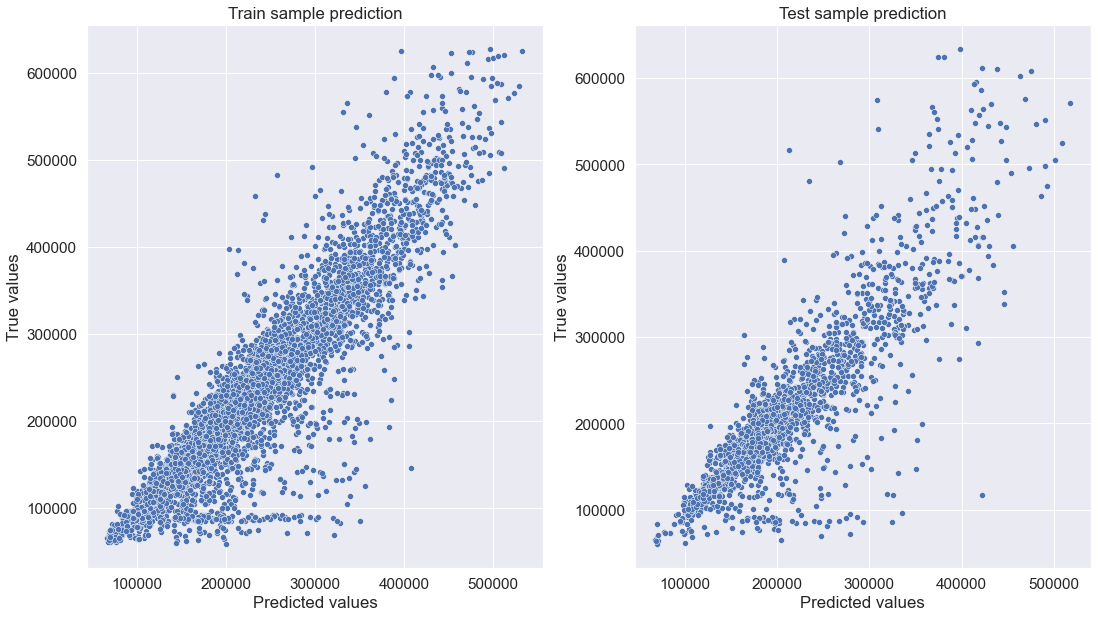

In [260]:
rf_model = RandomForestRegressor(max_depth=14, # глубина дерева  
                                 min_samples_leaf=6, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=225  # кол-во деревьев
                                 )
rf_model.fit(X_train, y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_valid)
evaluate_preds(y_train, train_pred, y_valid, test_pred)

### 8. Итоговое предсказание

In [261]:
X_train_itog = main_train.drop(['Price'], axis=1)
y_train_itog = main_train['Price']
rf_model.fit(X_train_itog, y_train_itog)


RandomForestRegressor(max_depth=14, min_samples_leaf=6, n_estimators=225,
                      random_state=42)

In [262]:
pred = pd.DataFrame(rf_model.predict(main_test), columns=['pred'])
pred

,pred
0,160550.204439
1,124580.842711
2,138762.110773
3,132655.042707
4,200986.729971
...,...
4995,172521.683990
4996,404559.057027
4997,150636.080013
4998,191683.363865


In [265]:
pred.to_csv('Migalev_predict.csv')